
<div style="border:solid navy 2px; padding: 20px">

<h1 style="color:navy; margin-bottom:20px">Задача</h1>

Проанализировать данные о продажах компьютерных игр в разные года, определить на каких играх стоит сосредоточиться в будущем году.

</div>



<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">Предобработка данных</h3>



</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import stats as st
import seaborn as sns

pd.set_option('float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('/Users/Alexander/Desktop/Juli_bag/Project_4/games_data.csv')
data_ESRB = pd.read_csv('/Users/Alexander/Desktop/Juli_bag/Project_4/rating.csv')

In [3]:
# Вывод describe
for col in df.columns:
    print(df[col].name)
    print(df[col].describe())
    print()
    

Unnamed: 0
count   4026.00
mean    2012.50
std     1162.35
min        0.00
25%     1006.25
50%     2012.50
75%     3018.75
max     4025.00
Name: Unnamed: 0, dtype: float64

platform
count     4026
unique      12
top        PS3
freq       708
Name: platform, dtype: object

sales_year
count   4026.00
mean    2016.88
std        1.01
min     2015.00
25%     2016.00
50%     2017.00
75%     2018.00
max     2018.00
Name: sales_year, dtype: float64

genre
count       4026
unique        12
top       Action
freq        1270
Name: genre, dtype: object

online
count   4026.00
mean      20.62
std       57.02
min        0.00
25%        0.00
50%        4.00
75%       17.00
max      966.00
Name: online, dtype: float64

offline
count   4026.00
mean      16.64
std       48.27
min        0.00
25%        0.00
50%        3.00
75%       13.00
max      909.00
Name: offline, dtype: float64

critic_score
count   1812.00
mean      71.27
std       13.10
min       13.00
25%       64.00
50%       74.00
75%       8

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 10 columns):
Unnamed: 0      4026 non-null int64
platform        4026 non-null object
sales_year      4026 non-null float64
genre           4026 non-null object
online          4026 non-null float64
offline         4026 non-null float64
critic_score    1812 non-null float64
user_score      2382 non-null object
rating          2315 non-null object
game_id         4026 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 314.6+ KB


In [5]:
#Столбцы, в которых вероятно требуется предобработка
for col in ['platform', 'genre','critic_score', 'user_score', 'rating']:
    print(df[col].name)
    print(df[col].unique())
    print()

platform
['PS3' 'X360' 'PS4' '3DS' 'Wii' 'DS' 'XOne' 'WiiU' 'PC' 'PSV' 'PSP' 'PS2']

genre
['Action' 'Shooter' 'Role-Playing' 'Racing' 'Platform' 'Misc' 'Simulation'
 'Sports' 'Fighting' 'Adventure' 'Puzzle' 'Strategy']

critic_score
[97. 88. nan 83. 85. 90. 73. 74. 78. 87. 71. 96. 82. 84. 92. 86. 91. 95.
 76. 93. 81. 94. 77. 80. 70. 72. 79. 75. 89. 66. 64. 67. 57. 68. 65. 55.
 63. 54. 61. 33. 59. 60. 69. 52. 53. 62. 56. 39. 49. 48. 51. 43. 50. 32.
 58. 47. 34. 46. 44. 31. 45. 41. 40. 42. 36. 23. 38. 35. 26. 24. 37. 21.
 19. 20. 25. 13.]

user_score
['8.2' '8.1' '3.4' nan '5.3' '4.8' '3.2' '8.3' '8.4' '2.6' '7.8' '7.2' '7'
 '8.7' '4.3' '6.6' '5.7' '5' '7.4' '7.5' '6.5' '9.1' '7.3' '6.9' '6.4'
 '6.1' '8.6' '7.9' '6.7' '5.4' '4' '8.5' '9' '4.9' '4.5' '6.2' '4.2' '6.3'
 '7.7' '9.2' '7.6' '8' '3.7' '4.1' '5.8' '5.6' '6.8' '5.5' '4.4' '5.9'
 '8.9' '3.9' 'tbd' '3.1' '2.9' '6' '4.7' '7.1' '8.8' '5.1' '3.5' '2.5' '3'
 '2.7' '2.2' '5.2' '1.8' '3.8' '3.3' '4.6' '9.3' '1.6' '3.6' '2.4' '2.8'
 '1.

In [6]:
#tbd = To Be Determined (будет определено позже), пока равнозначно nan

df['user_score'] = df['user_score'].replace('tbd', np.nan)
    
df['user_score'] = df['user_score'].astype('float64')

df = df.drop_duplicates().reset_index(drop = True)


In [7]:
# Для целочисленных столбцов, меняю тип на int

for col in ['sales_year', 'online', 'offline']:
    try:
        df[col] = df[col].astype(int)
    except ValueError:
        print('Не подходящее значение')
    except Exception:
        print('Встретилась непредвиденная ошибка')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 10 columns):
Unnamed: 0      4026 non-null int64
platform        4026 non-null object
sales_year      4026 non-null int64
genre           4026 non-null object
online          4026 non-null int64
offline         4026 non-null int64
critic_score    1812 non-null float64
user_score      2032 non-null float64
rating          2315 non-null object
game_id         4026 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 314.6+ KB



<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
    Постройте распределение количества игр по годам продажи и опишите полученный результат
    </h3>
</div>

In [8]:
def group_col(table, col, action):
    table_new = table.groupby(col, as_index = False).agg({'online':action, 
                      'offline':action, 'sum_sales':action})
    table_new.set_axis([table[col].name,'online','offline', 'sum_sales'], 
                       axis='columns', inplace=True)
    return(table_new)

In [9]:
def graph_built(data1, data2, x1, y1, y2, label_text1, label_text2):
    ax = data1.plot(linestyle='-', marker = 'o', x=x1, y=y1, linewidth=3, alpha=0.8,
                    label=label_text1 , color='navy') 
    data2.plot(linestyle='-', marker = 'o',x=x1, y=y2, linewidth=3, alpha=0.8, 
               label=label_text2, color='green',ax=ax, grid=True, legend=True) 
    plt.show()
    return

In [10]:
def one_graph_built(data1, x1, y1, label_text):
    data1.plot(linestyle='-', marker = 'o',x=x1, y=y1, linewidth=3, alpha=0.8,
               label=label_text, color='navy', grid=True, legend=True) 
    plt.show()
    return

In [11]:
df['sum_sales'] = df['online'] + df['offline']
df_sale_count = df.groupby('sales_year', as_index = False)['game_id'].agg('count')

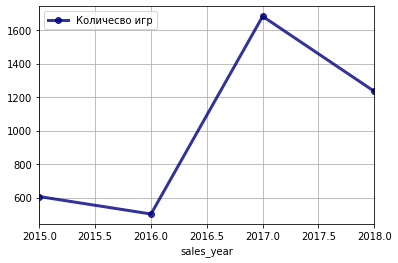

In [12]:
one_graph_built(df_sale_count, 'sales_year', 'game_id', 'Количесво игр')


In [13]:
df_sale_count

,sales_year,game_id
0,2015,606
1,2016,502
2,2017,1683
3,2018,1235



<div style="border:solid navy 2px; padding: 20px">

<p>
    В 2017 году вышло в 3 раза больше игр, по сравнению с 2016 годом. В 2018 количество выпущенных в продажу игр уменьшилось на 1/4
</p>
</div>


<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
    Постройте распределение по годам продажи для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод.
    </h3>
</div>

In [14]:
#За отзыв принимаю оценки критика, пользователя или наличие значения рейтинга
# df_score использую ниже для подсчета корреляции 
df_nan_score = df[df['critic_score'].isna() & df['user_score'].isna() & df['rating'].isna()]
df_score = df.drop(df_nan_score.index)

df_nan_score_group = group_col(df_nan_score, 'sales_year', 'sum')
df_score_group = group_col(df_score, 'sales_year', 'sum')

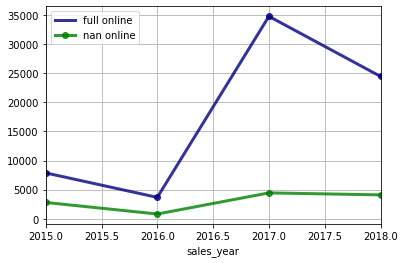

In [15]:
graph_built(df_score_group, df_nan_score_group, 'sales_year', 'online', 'online',
            'full online', 'nan online')

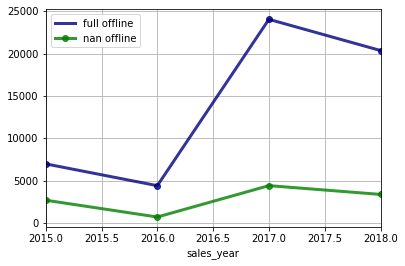

In [16]:
graph_built(df_score_group, df_nan_score_group, 'sales_year', 'offline', 'offline',
            'full offline', 'nan offline')

In [17]:
#Без оценок
print('Количество игр без оценки =', df_nan_score.shape[0])

mean_nan = df_nan_score['sum_sales'].sum()/df_nan_score.shape[0]
print('Среднее количество продаж одной игры = {:.0f}'.format(mean_nan))

Количество игр без оценки = 1644
Среднее количество продаж одной игры = 14


In [18]:
#с оценками
print('Количество игр с оценкой =', df_score.shape[0])

mean_full = df_score['sum_sales'].sum()/df_score.shape[0]
print('Среднее количество продаж одной игры = {:.0f}'.format(mean_full))

Количество игр с оценкой = 2382
Среднее количество продаж одной игры = 53



<div style="border:solid navy 2px; padding: 20px">

<p>
    Количество игр с оценкой в 12 раз больше, чем без нее , но продажи для игр с оценкой в среднем в 3 раза выше.
</p>
</div>



<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
    Постройте график по суммам продаж каждого года
    </h3>
</div>

In [19]:
df_sale = group_col(df, 'sales_year', 'sum')

In [20]:
df_sale

,sales_year,online,offline,sum_sales
0,2015,10684,9672,20356
1,2016,4493,5119,9612
2,2017,39240,28446,67686
3,2018,28574,23731,52305


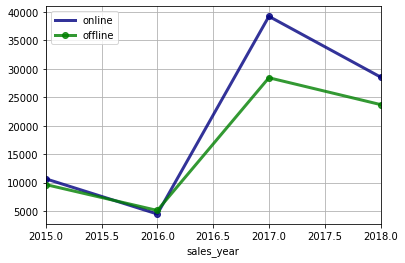

In [21]:
graph_built(df_sale, df_sale, 'sales_year', 'online', 'offline', 'online', 'offline')


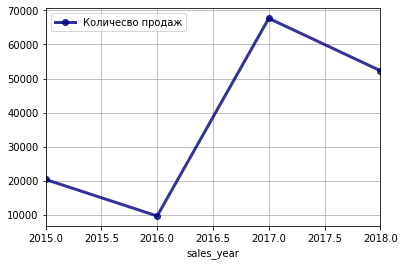

In [22]:
one_graph_built(df_sale, 'sales_year', 'sum_sales', 'Количесво продаж')



<div style="border:solid navy 2px; padding: 20px">

<p>
В 2015 и 2016 годах количество online и offline продаж практически совпадает, в 2016 году снижается количество продаж, в 2017 году количество продаж увеличивается в 7 раз, и online продаж больше почти на 11000. В 2018 наблюдается спад продаж, но online продажи по прежнему лидируют, их больше на 5000.
</p>
</div>

In [23]:
df_sale

,sales_year,online,offline,sum_sales
0,2015,10684,9672,20356
1,2016,4493,5119,9612
2,2017,39240,28446,67686
3,2018,28574,23731,52305



<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
    Постройте ящик с усами по общим продажам, опишите полученный результат
    </h3>
</div>


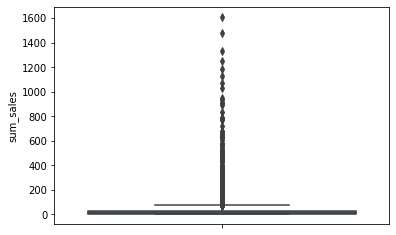

In [24]:
sns.boxplot(y='sum_sales', data=df)
plt.show()

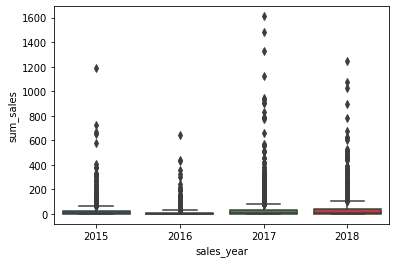

In [25]:
sns.boxplot(x='sales_year', y='sum_sales', data=df)
plt.show()

In [26]:
df['sum_sales'].describe()

count   4026.00
mean      37.25
std       99.35
min        0.00
25%        0.00
50%        8.00
75%       31.00
max     1611.00
Name: sum_sales, dtype: float64


<div style="border:solid navy 2px; padding: 20px">

<p>
75% значений близки к нулю
</p>
</div>


<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
Узнайте, на какой платформе было продано больше всего игр
    </h3>
</div>


In [27]:
# Количество вышедших игр
df_pl = df.groupby('platform', as_index = False)['game_id'].agg('count')

In [28]:
#Количество продаж
df_platform = group_col(df, 'platform', 'sum')
df_platform['count'] = df_pl['game_id']
df_platform['sum_sale'] = df_platform['online'] + df_platform['offline']

df_platform = df_platform.sort_values(by='sum_sale', ascending=False)
df_platform

,platform,online,offline,sum_sales,count,sum_sale
10,X360,22675,11709,34384,498,34384
4,PS3,16823,16307,33130,708,33130
5,PS4,10873,14106,24979,393,24979
11,XOne,9312,5157,14469,247,14469
0,3DS,8265,6126,14391,512,14391
2,PC,2988,5669,8657,389,8657
8,Wii,4854,2960,7814,197,7814
9,WiiU,3809,2513,6322,147,6322
1,DS,1913,924,2837,185,2837
7,PSV,1247,1307,2554,431,2554


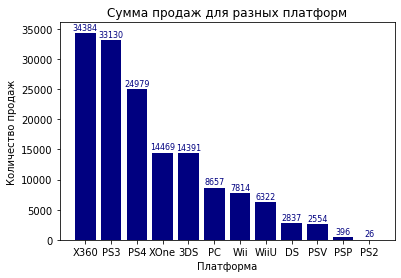

In [29]:
plt.bar(df_platform['platform'], df_platform['sum_sale'], align='center', width= 0.8, color='navy', alpha=1)

plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Сумма продаж для разных платформ')
for i in range(len(df_platform['platform'])):
    plt.text(x= df_platform.loc[i,'platform'], y=df_platform.loc[i,'sum_sale']+500, s=df_platform.loc[i,'sum_sale'],
             horizontalalignment='center', color='navy', size = 8)
plt.show()

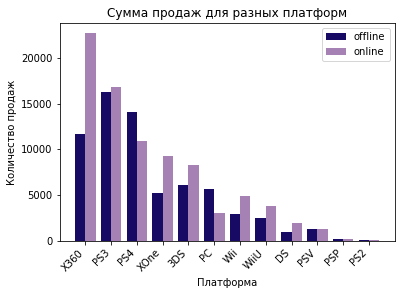

In [30]:
bars1 = df_platform['offline'].tolist()
bars2 = df_platform['online'].tolist()
 
names = df_platform['platform']

x = np.arange(len(names)) 
width = 0.4

p1=plt.bar(x - width/2, bars1, width, color='#160A65', alpha=1)
p2=plt.bar(x + width/2,  bars2, width,color='#814C94', alpha=0.7)

plt.xticks([r for r in range(len(bars1))], names, horizontalalignment='right', rotation=45)
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Сумма продаж для разных платформ')
plt.legend((p1[0],p2[0]), ('offline','online'))
plt.show()


<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
Определите, игр какого жанра больше всего
    </h3>
</div>


In [31]:
df.head()

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sum_sales
0,0,PS3,2017,Action,702,909,97.00,8.20,M,20838,1611
1,1,X360,2017,Action,966,514,97.00,8.10,M,48673,1480
2,2,X360,2017,Shooter,904,424,88.00,3.40,M,17801,1328
3,3,PS4,2015,Shooter,603,586,nan,nan,NaN,12200,1189
4,4,3DS,2017,Role-Playing,528,419,nan,nan,NaN,11432,947


In [32]:
df_genre = df.groupby('genre', as_index = False)['game_id'].agg('count')
df_genre = df_genre.sort_values(by='game_id', ascending=False)
df_genre

,genre,game_id
0,Action,1270
7,Role-Playing,467
1,Adventure,410
10,Sports,389
3,Misc,375
8,Shooter,329
6,Racing,180
2,Fighting,159
9,Simulation,137
4,Platform,122


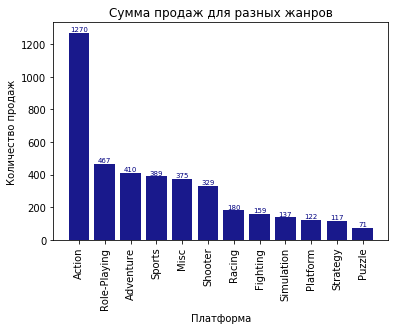

In [33]:

plt.bar(df_genre['genre'], df_genre['game_id'], align='center', width= 0.8, color='navy', alpha=0.9)

plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Сумма продаж для разных жанров')
for i in range(len(df_genre['genre'])):
    plt.text(x= df_genre.loc[i,'genre'], y=df_genre.loc[i,'game_id']+10, 
        s=df_genre.loc[i,'game_id'], horizontalalignment='center', color='navy', size = 7)
bars = df_genre['genre'].tolist()
plt.xticks(bars, rotation=90)
plt.show()


<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
Найдите игры с наибольшей и наименьшей оценкой от пользователей
    </h3>
</div>


In [34]:
df_user_score = df[~df['user_score'].isna()]
df_user_score = df_user_score.sort_values(by='user_score', ascending=False)
user_score_head = df_user_score.head(10)
user_score_tail = df_user_score.tail(10)

In [35]:
user_score_head

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sum_sales
2348,2348,PSV,2015,Adventure,0,3,86.00,9.30,M,38270,3
639,639,PC,2015,Role-Playing,21,46,93.00,9.30,M,12365,67
77,77,PS4,2015,Role-Playing,102,213,92.00,9.20,M,43575,315
339,339,XOne,2015,Role-Playing,69,50,91.00,9.20,M,10495,119
2277,2277,PSV,2017,Adventure,4,4,83.00,9.20,M,27691,8
403,403,PSV,2018,Role-Playing,36,23,93.00,9.20,M,42967,59
41,41,PS3,2017,Action,241,218,95.00,9.10,M,12655,459
32,32,WiiU,2018,Racing,315,215,88.00,9.10,E,24993,530
201,201,3DS,2018,Role-Playing,90,45,92.00,9.10,T,25903,135
65,65,WiiU,2017,Platform,211,116,93.00,9.00,E,37029,327


In [36]:
user_score_tail

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sum_sales
655,655,Wii,2018,Action,18,44,nan,1.60,E,26822,62
1549,1549,PS4,2015,Sports,9,8,32.00,1.50,T,29346,17
3937,3937,PC,2015,Sports,0,1,nan,1.40,E,15250,1
3552,3552,PC,2018,Role-Playing,0,2,57.00,1.40,M,34674,2
2812,2812,X360,2017,Racing,4,1,19.00,1.30,M,11902,5
2321,2321,X360,2017,Shooter,7,2,43.00,1.20,M,24620,9
3026,3026,PS3,2017,Racing,2,1,13.00,1.00,M,28618,3
2695,2695,DS,2017,Platform,6,0,nan,0.90,E,14384,6
1739,1739,X360,2016,Sports,14,2,nan,0.70,E,28773,16
2118,2118,PS3,2016,Sports,7,2,nan,0.20,E,23493,9



<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
Найдите игры с наибольшей и наименьшей оценкой от критиков
    </h3>
</div>


In [37]:
df_critic_score = df[~df['critic_score'].isna()]
df_critic_score = df_user_score.sort_values(by='critic_score', ascending=False)
critic_score_head = df_user_score.head(10)
critic_score_tail = df_user_score.tail(10)

In [38]:
critic_score_head

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sum_sales
2348,2348,PSV,2015,Adventure,0,3,86.00,9.30,M,38270,3
639,639,PC,2015,Role-Playing,21,46,93.00,9.30,M,12365,67
77,77,PS4,2015,Role-Playing,102,213,92.00,9.20,M,43575,315
339,339,XOne,2015,Role-Playing,69,50,91.00,9.20,M,10495,119
2277,2277,PSV,2017,Adventure,4,4,83.00,9.20,M,27691,8
403,403,PSV,2018,Role-Playing,36,23,93.00,9.20,M,42967,59
41,41,PS3,2017,Action,241,218,95.00,9.10,M,12655,459
32,32,WiiU,2018,Racing,315,215,88.00,9.10,E,24993,530
201,201,3DS,2018,Role-Playing,90,45,92.00,9.10,T,25903,135
65,65,WiiU,2017,Platform,211,116,93.00,9.00,E,37029,327


In [39]:
critic_score_tail

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sum_sales
655,655,Wii,2018,Action,18,44,nan,1.60,E,26822,62
1549,1549,PS4,2015,Sports,9,8,32.00,1.50,T,29346,17
3937,3937,PC,2015,Sports,0,1,nan,1.40,E,15250,1
3552,3552,PC,2018,Role-Playing,0,2,57.00,1.40,M,34674,2
2812,2812,X360,2017,Racing,4,1,19.00,1.30,M,11902,5
2321,2321,X360,2017,Shooter,7,2,43.00,1.20,M,24620,9
3026,3026,PS3,2017,Racing,2,1,13.00,1.00,M,28618,3
2695,2695,DS,2017,Platform,6,0,nan,0.90,E,14384,6
1739,1739,X360,2016,Sports,14,2,nan,0.70,E,28773,16
2118,2118,PS3,2016,Sports,7,2,nan,0.20,E,23493,9



<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
Оцените корреляцию между оценками критиков и пользовательскими оценками.
    </h3>
</div>

              critic_score  user_score
critic_score          1.00        0.53
user_score            0.53        1.00


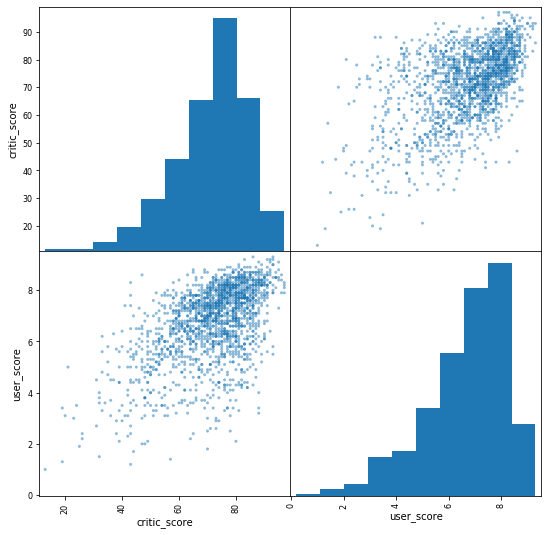

In [40]:
df_score_stat = df_score.pivot_table(index=df_score.index, values=['critic_score', 'user_score'], aggfunc='mean')
print(df_score_stat.corr())
pd.plotting.scatter_matrix(df_score_stat, grid=30, figsize=(9,9))
plt.show()


<div style="border:solid navy 2px; padding: 20px">

<p>
Корреляция есть, но не сильная = 0.53
</p>
</div>


<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
    Для покупателей интернет-магазина и сети розничных магазинов определите:
    </h3>
топ-5 предпочтительных жанров

в какие года пользователи были наиболее активны (больше всего покупали игры)

топ-5 предпочтительных платформ

какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)
    
</div>



In [41]:
def top_5(col_group, col_sort, action = 'sum'):
    df_top = df.groupby(col_group, as_index = False)[col_sort].agg(action)
    df_top = df_top.sort_values(by=col_sort, ascending=False)
    return(df_top.head())

In [42]:
#топ-5 предпочтительных жанров
df1 = top_5('genre', 'sum_sales')
# в какие года пользователи были наиболее активны (больше всего покупали игры)
df2 = top_5('sales_year', 'sum_sales')
#топ-5 предпочтительных платформ
df3 = top_5('platform', 'sum_sales')
#какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)
df4 = top_5('rating', 'game_id', 'count')

In [43]:
from IPython.display import display_html

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Genre')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Year')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('Platform')
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption('Rating')

display_html(df1_styler._repr_html_() +' '+ df2_styler._repr_html_() +' '+ 
             df3_styler._repr_html_() +' '+ df4_styler._repr_html_(), raw=True)

,genre,sum_sales
0,Action,42998
8,Shooter,34241
10,Sports,19713
7,Role-Playing,14606
3,Misc,10939
,sales_year,sum_sales
2,2017,67686
3,2018,52305
0,2015,20356
1,2016,9612


<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
    Проверьте гипотезы:
    </h3>
<h6>Средний пользовательский рейтинг платформ PS3 и PS4 одинаковый</h6>

H0: средний пользовательский рейтинг платформ PS3 и PS4 одинаковый

H1: средний пользовательский рейтинг платформ PS3 и PS4 различается
    
</div>



In [44]:
df_ps4 = df[df['platform']=='PS4']

df_ps4 = df_ps4[-df_ps4['user_score'].isna()]
df_ps4['user_score'].var()

2.130084812743191

In [45]:
df_ps4['user_score'].describe()

count   257.00
mean      6.75
std       1.46
min       1.50
25%       6.10
50%       7.00
75%       7.80
max       9.20
Name: user_score, dtype: float64

In [46]:
df_ps3 = df[df['platform']=='PS3']

df_ps3 = df_ps3[-df_ps3['user_score'].isna()]
df_ps3['user_score'].var()

2.449459509315623

In [47]:
df_ps3['user_score'].describe()

count   417.00
mean      6.61
std       1.57
min       0.20
25%       5.80
50%       7.00
75%       7.80
max       9.10
Name: user_score, dtype: float64

In [48]:
alpha = .05
results = st.ttest_ind(df_ps4['user_score'], df_ps3['user_score'], equal_var = False)

print('p-значение = ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение =  0.2543695482219482
Не получилось отвергнуть нулевую гипотезу



<div style="border:solid navy 2px; padding: 20px">

<p>
Cредний пользовательский рейтинг платформ PS3 и PS4 одинаковый
</p>
</div>

<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
    Проверьте гипотезы:
    </h3>
    
<h6>Средний пользовательский рейтинг жанров Action и Sports различается</h6>

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

H1: средний пользовательский рейтинг жанров Action и Sports различается

</div>



In [49]:
df_action = df[df['genre']=='Action']

df_action = df_action[-df_action['user_score'].isna()]
df_action['user_score'].var() 
df_action['user_score'].describe()


count   664.00
mean      6.78
std       1.35
min       1.60
25%       6.10
50%       7.10
75%       7.80
max       9.10
Name: user_score, dtype: float64

In [50]:
df_sports = df[df['genre']=='Sports']
df_sports = df_sports[-df_sports['user_score'].isna()]
df_sports['user_score'].var()
df_sports['user_score'].describe()

count   246.00
mean      5.65
std       1.70
min       0.20
25%       4.40
50%       6.00
75%       6.90
max       8.80
Name: user_score, dtype: float64

In [51]:
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var = False)

print('p-значение = ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение =  8.285648549432565e-19
Отвергаем нулевую гипотезу



<div style="border:solid navy 2px; padding: 20px">

<p>
    Рейтинг разный - 6 и 7.1. В интервале от 0 до 10 разница оказалась существенной.
</p>
</div>

<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy; margin-bottom:20px">
    Вывод
    </h3>
<p>
В 2017 и 2018 популярны те же жанры игр, что и по всей выборке. Наиболее популярные платформы: X360, PS3 и PS4. Популярны игры "для всех", "от 17 лет", "Подросткам 13—19 лет", "Для всех старше 10 лет".
</p>
</div>